In [136]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [137]:
os.chdir("C:\\Users\\kumarma\\My Codebase\\Height-Weight-Regression-Problem")
df=pd.read_csv('data.csv')

In [138]:
#df=df.iloc[:,1:3]
#df=df[df['Height(Inches)']>70]
#df

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
Index             25000 non-null int64
Height(Inches)    25000 non-null float64
Weight(Pounds)    25000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [140]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [141]:
df=df.iloc[:,1:]
#df.head()

In [142]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [143]:
#Function to draw Histogram and Blxplot for all Measures and Bar Graph for all the Dimensions

def analyze_data (df):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    

    for i in list (df.columns):
        #Histogram and #BoxPlot
        if (df[i].dtype in ['float64','int64']):
            df.hist(column=i,grid=False,figsize=(10,8))
            plt.savefig(str(i)+"_histogram.png")
            #plt.show()
            plt.close()
        #Box Plot
            df.boxplot(column=i,grid=False,figsize=(10,8))
            plt.savefig(str(i)+"_boxplot.png")
            plt.close()
        else:
        #Bar Graph
            sns.countplot(df[i])
            plt.savefig(str(i)+"_bar_graph.png")
            plt.close()

In [144]:
#Creating the summary file

def count_nulls_outliers(df):
    x=df[df.columns].describe(include='all')
    x.to_csv('summary.csv')

    #Finding count of the missing values
    row=['missing values']
    for i in list(df.columns):
        row.append(df[i].isnull().sum())

    with open('summary.csv','a') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(row)
    csvfile.close()
    print(row)
    
    #Finding the count of outliers
    row1=['outliers']
    for i in list(df.columns):
        if df[i].dtype in ('int64', 'float64'):
            row1.append((df[i] > (df.loc[:,i].mean() + (df.loc[:,i].std()*3))).sum())
        else:
            row1.append('NA')
        
    with open('summary.csv','a') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(row1)
    csvfile.close()
    print(row1)

In [145]:
#Calling the analyze_data function with the data frame

analyze_data(df)

In [146]:
#Calling the count_nulls_outliers function with the data frame

count_nulls_outliers(df)

['missing values', 0, 0]
['outliers', 33, 29]


In [147]:
df1=df[df['Height(Inches)'] > (df.loc[:,'Height(Inches)'].mean() + (df.loc[:,'Height(Inches)'].std()*3))]
df2=df[df['Weight(Pounds)'] > (df.loc[:,'Weight(Pounds)'].mean() + (df.loc[:,'Weight(Pounds)'].std()*3))]

In [148]:
print(df.shape)
print(df1.count())
print(df2.count())
print('Height Outliers')
print(df1)
print('Weight Outliers')
print(df2)
print(df.info())
print(df.shape)

(25000, 2)
Height(Inches)    33
Weight(Pounds)    33
dtype: int64
Height(Inches)    29
Weight(Pounds)    29
dtype: int64
Height Outliers
       Height(Inches)  Weight(Pounds)
138          73.90107        151.3913
174          73.83364        139.2983
1162         74.24899        150.2167
1383         74.19488        129.0597
1893         75.15280        146.9701
2395         73.99549        142.9016
2481         75.11519        153.9562
4191         74.03777        139.5953
4508         74.28376        147.7877
6627         73.72628        142.8110
7269         73.81695        140.0915
7839         73.85521        136.0667
8472         73.95409        145.2695
8828         74.27270        144.6600
9225         73.75335        153.1022
9492         74.05895        133.8172
10330        74.36328        164.6643
10635        73.88574        135.9816
11173        74.16797        142.7732
13681        74.74047        155.5462
14063        74.04804        149.6303
15209        74.59993      

In [149]:
#Looking at the outlier values they seem to be legit, so no outlier treament is required
#Also, since there are no null values, that also does not need to be traeted as well

In [150]:
# Implementing Simple Linear Regression

# Importing the dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print('Height')
print('======')
print (X)
print('Weight')
print('======')
print (y)

Height
[[65.78331]
 [71.51521]
 [69.39874]
 ...
 [64.69855]
 [67.52918]
 [68.87761]]
Weight
[112.9925 136.4873 153.0269 ... 118.2655 132.2682 124.8742]


In [151]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


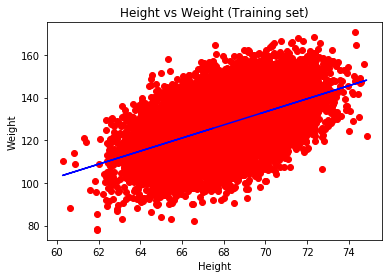

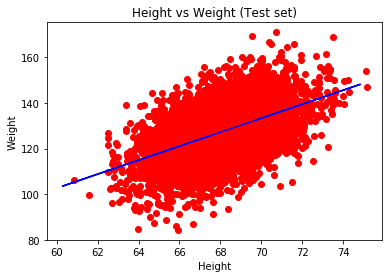

In [152]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Height vs Weight (Training set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Height vs Weight (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [153]:
y_test

array([134.2032, 141.6617, 111.6239, ..., 133.2004, 159.9584, 127.9335])

In [154]:
y_pred

array([123.33549794, 134.00612771, 124.67667359, ..., 125.68063341,
       130.43237501, 123.04698086])

In [155]:
regressor.intercept_
regressor.coef_

from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print('MSE = ' + str(MSE))
RMSE=math.sqrt(MSE)
print('RMSE = ' + str(RMSE))

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred, multioutput='variance_weighted')
print('R-Squared = '+ str(r2))

#from sklearn.metrics import 

print('Regressor Score = ' + str(regressor.score(X,y)))

MSE = 105.05298919282606
RMSE = 10.249536047686552
R-Squared = 0.25883302999241287
Regressor Score = 0.25283197078206754


In [190]:
# Outlier removal
df=pd.read_csv('data.csv')
df=df.drop(['Index'],axis=1)
df=df[df['Height(Inches)'] < ((df.loc[:,'Height(Inches)'].mean() + (df.loc[:,'Height(Inches)'].std()*3)))]
df=df[df['Height(Inches)'] > ((df.loc[:,'Height(Inches)'].mean() - (df.loc[:,'Height(Inches)'].std()*3)))]
df=df[df['Weight(Pounds)'] < ((df.loc[:,'Weight(Pounds)'].mean() + (df.loc[:,'Weight(Pounds)'].std()*3)))]
df=df[df['Weight(Pounds)'] > ((df.loc[:,'Weight(Pounds)'].mean() - (df.loc[:,'Weight(Pounds)'].std()*3)))]
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
print(X)
print(y)

[[65.78331]
 [71.51521]
 [69.39874]
 ...
 [64.69855]
 [67.52918]
 [68.87761]]
[112.9925 136.4873 153.0269 ... 118.2655 132.2682 124.8742]


In [191]:
df.shape

(24882, 2)

In [192]:
#Creating the Training and the Test Set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [193]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

y_pred=regressor.predict(X_test)

In [194]:
regressor.intercept_
regressor.coef_

from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print('MSE = ' + str(MSE))
RMSE=math.sqrt(MSE)
print('RMSE = ' + str(RMSE))

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred, multioutput='variance_weighted')
print('R-Squared = '+ str(r2))

#from sklearn.metrics import 

print('Regressor Score: ' + str(regressor.score(X,y)))

MSE = 98.8343981655001
RMSE = 9.941549082788864
R-Squared = 0.24399368932936683
Regressor Score: 0.2441229792414632


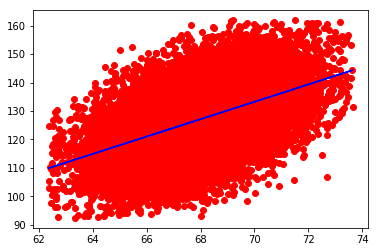

In [195]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.show()
plt.close()

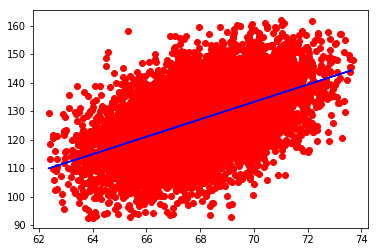

In [196]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.show()
plt.close()

So it is observed that:

R-Squared - Before removing Outliers was 0.2581

R-Squared - After removing Outliers was 0.2439

I think I should first see the distribution of data Height to understand the data better

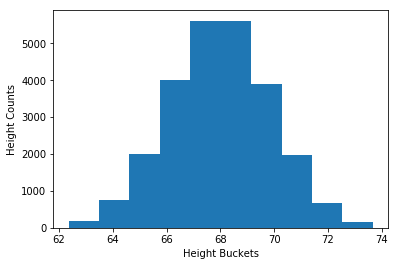

In [197]:
plt.hist(X)
plt.xlabel('Height Buckets')
plt.ylabel('Height Counts')
plt.show()
plt.close()

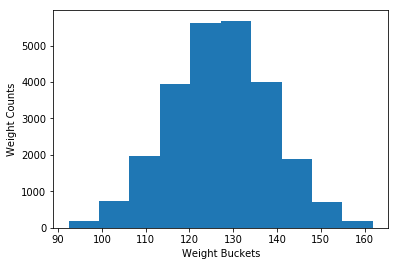

In [198]:
plt.hist(y)
plt.xlabel('Weight Buckets')
plt.ylabel('Weight Counts')
plt.show()
plt.close()

In [216]:
standard_deviation = math.sqrt((((X.mean() - X) ** 2).sum()) / 25000)
skewness = (((X.mean() - X) ** 3).sum()) / 25000
curtosis = (((X.mean() - X) ** 4).sum()) / 25000

skewness_coefficient = (skewness ** 2) / (standard_deviation ** 3)
curtosis_coefficient = curtosis / (standard_deviation ** 2)

print('Std Dev : ' + str(standard_deviation))
print('Skewness: ' + str(skewness))
print('Co-eff of Skewness : '+ str(skewness_coefficient))
print('Curtosis : ' + str(curtosis))
print('Co-eff of Custosis : '+str(curtosis_coefficient))

Std Dev : 1.9016407372498432
Skewness: 0.03890637043946492
Co-eff of Skewness : 0.00022011823308324636
Curtosis : 38.76868868417956
Co-eff of Custosis : 10.720725271261609


Skewness co-efficient refernce:
1. Between -0.5 to +0.5 ==> Fairly Symmetrical
2. Between -1.0 to -0.5 or +0.5 to +1.0 ==> Moderately Skewed
3. <-1.0 or >+1.0 - Highly Skewed

Custosis co-efficient refernce:
1. Normal Distribution = 3 i.e. Mesokurtic
2. >3 - Heavier Tails (with lots of outliers) i.e. Leptokurtic
3. <3 - Lighter Tails (With less or no outliers) i.e. platycurtic

# Let's see how Random Forest predicts the weights

In [200]:
df=pd.read_csv('Data.csv')
X=df.iloc[:,1:2].values
y=df.iloc[:,2].values
print(X)
print(y)

[[65.78331]
 [71.51521]
 [69.39874]
 ...
 [64.69855]
 [67.52918]
 [68.87761]]
[112.9925 136.4873 153.0269 ... 118.2655 132.2682 124.8742]


In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#X_train=X_train.reshape(-1,1)
#y_train=y_train.reshape(-1,1)
#X_test=X_test.reshape(-1,1)
#y_test=y_test.reshape(-1,1)

In [202]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[67.46994]
 [66.50874]
 [69.39596]
 ...
 [63.93049]
 [66.97528]
 [69.77321]]
[121.8602 132.745  131.8885 ... 108.3559 133.7971 143.6484]
[[66.75233]
 [70.23626]
 [67.19022]
 ...
 [67.51801]
 [69.06944]
 [66.65813]]
[134.2032 141.6617 111.6239 ... 133.2004 159.9584 127.9335]


In [203]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

#for i in range(1, 150):
regressor = RandomForestRegressor(n_estimators=150, random_state=0)
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
r2=r2_score(y_test, y_pred, multioutput='variance_weighted')
print('R-Squared = ' + str(r2))

R-Squared = -0.06170015335564605


In [204]:
print('Regressor Score: ' + str(regressor.score(y_test.reshape(-1,1),y_pred)))

Regressor Score: -0.34484194238825694


In [205]:
print(y_test)
print(y_pred)

[134.2032 141.6617 111.6239 ... 133.2004 159.9584 127.9335]
[131.10096667 126.88048333 125.31579667 ... 124.889018   139.07283533
 118.96792267]


In [206]:
df_val=pd.DataFrame()
df_val['y_test']=y_test
print(df_val)
df_val['y_pred']=y_pred
print(df_val)

        y_test
0     134.2032
1     141.6617
2     111.6239
3     118.2317
4     102.6027
...        ...
4995  135.6229
4996  150.5815
4997  133.2004
4998  159.9584
4999  127.9335

[5000 rows x 1 columns]
        y_test      y_pred
0     134.2032  131.100967
1     141.6617  126.880483
2     111.6239  125.315797
3     118.2317  134.018157
4     102.6027  122.534229
...        ...         ...
4995  135.6229  129.302226
4996  150.5815  129.377105
4997  133.2004  124.889018
4998  159.9584  139.072835
4999  127.9335  118.967923

[5000 rows x 2 columns]


In [207]:
df_val.to_csv('Predictions-using-random-forest.csv')

# Using SV

In [210]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test.reshape(-1,1))


r2=r2_score(y_test, y_pred, multioutput='variance_weighted')

print(r2)

score=regressor.score(y_test.reshape(-1,1),y_pred)
print (score)

0.25578619247636947
-0.0021623640112831133


# Using Polynomial Regression

In [211]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

lin_reg_2 = LinearRegression(fit_intercept=False, normalize=True)
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

In [212]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [213]:
r2=r2_score(y_test,y_pred,multioutput='variance_weighted')
print(r2)

0.2587588945760039
